In [115]:
#pip install matplotlib seaborn
#!pip install scikit-learn

In [116]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [117]:
file_name = "Disease_Data.csv"

In [118]:
df = pd.read_csv(file_name, sep = ';')

pd.set_option('display.max_columns', None)
df.head()

/var/folders/k7/rck94jsj7w3_47f2r29h3vn80000gn/T/ipykernel_1759/46842133.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, sep = ';')


,RowId,YearStart,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,Geolocation
0,NVSS~2000~1~NV001~OVR01~Age-Standardized,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Age-Standardized,"Rate per 100,000","508,2","508,2",NaN,NaN,"508,2","508,2",Overall,Overall,C1,T1,NV001,AgeStdz,BOC01,OVR01,1,POINT (-86.63186076 32.84057112)
1,NVSS~2000~1~NV001~OVR01~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000","525,6","525,6",NaN,NaN,"525,6","525,6",Overall,Overall,C1,T1,NV001,Crude,BOC01,OVR01,1,POINT (-86.63186076 32.84057112)
2,NVSS~2000~1~NV001~GEN01~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000","514,9","514,9",NaN,NaN,"514,9","514,9",Gender,Male,C1,T1,NV001,Crude,BOC02,GEN01,1,POINT (-86.63186076 32.84057112)
3,NVSS~2000~1~NV001~GEN01~Age-Standardized,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Age-Standardized,"Rate per 100,000","550,4","550,4",NaN,NaN,"550,4","550,4",Gender,Male,C1,T1,NV001,AgeStdz,BOC02,GEN01,1,POINT (-86.63186076 32.84057112)
4,NVSS~2000~1~NV001~GEN02~Age-Standardized,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Age-Standardized,"Rate per 100,000","471,7","471,7",NaN,NaN,"471,7","471,7",Gender,Female,C1,T1,NV001,AgeStdz,BOC02,GEN02,1,POINT (-86.63186076 32.84057112)


In [119]:
df.Data_Value_Unit.unique()

array(['Rate per 100,000'], dtype=object)

In [120]:
df.Break_Out.unique()

array(['Overall', 'Male', 'Female', '18-24', '25-44', '45-64', '65', '35',
       '75', 'Non-Hispanic White', 'Non-Hispanic Black', 'Hispanic',
       'Other'], dtype=object)

In [121]:
df.BreakOutId.unique()

array(['OVR01', 'GEN01', 'GEN02', 'AGE01', 'AGE04', 'AGE05', 'AGE06',
       'AGE07', 'AGE08', 'RAC01', 'RAC02', 'RAC04', 'RAC07'], dtype=object)

In [122]:
df.Break_Out_Category.value_counts()

Break_Out_Category
Race       69888
Age        52416
Gender     34944
Overall    17472
Name: count, dtype: int64

In [123]:
df.YearStart.value_counts()

YearStart
2000    8320
2001    8320
2002    8320
2003    8320
2004    8320
2005    8320
2006    8320
2007    8320
2008    8320
2009    8320
2010    8320
2011    8320
2012    8320
2013    8320
2014    8320
2015    8320
2016    8320
2017    8320
2018    8320
2019    8320
2020    8320
Name: count, dtype: int64

In [124]:
df.isna().sum()

RowId                              0
YearStart                          0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
PriorityArea1                 131040
PriorityArea2                 174720
PriorityArea3                 131040
PriorityArea4                 174720
Class                              0
Topic                              0
Question                           0
Data_Value_Type                    0
Data_Value_Unit                    0
Data_Value                     31630
Data_Value_Alt                     0
Data_Value_Footnote_Symbol    143090
Data_Value_Footnote           143090
Low_Confidence_Limit           31630
High_Confidence_Limit          31630
Break_Out_Category                 0
Break_Out                          0
ClassId                            0
TopicId                            0
QuestionId                         0
Data_Value_TypeID                  0
BreakOutCategoryId                 0
B

In [125]:
df.dtypes

RowId                          object
YearStart                       int64
LocationAbbr                   object
LocationDesc                   object
DataSource                     object
PriorityArea1                  object
PriorityArea2                 float64
PriorityArea3                  object
PriorityArea4                 float64
Class                          object
Topic                          object
Question                       object
Data_Value_Type                object
Data_Value_Unit                object
Data_Value                     object
Data_Value_Alt                 object
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit           object
High_Confidence_Limit          object
Break_Out_Category             object
Break_Out                      object
ClassId                        object
TopicId                        object
QuestionId                     object
Data_Value_TypeID              object
BreakOutCate

In [126]:
df = df.drop(df[df['Break_Out_Category'] == 'Race'].index) 
df = df.drop(df[df['Break_Out_Category'] == 'Gender'].index) 
df = df.drop(df[df['Data_Value_Type'] == 'Age-Standardized'].index) 

In [127]:
df = df.drop(df[df['Data_Value'] == ''].index) 
df = df.drop(df[df['Data_Value_Alt'] == ''].index) 
df.dropna(subset=['Data_Value'], inplace=True)

In [128]:
df['Data_Value'] = df['Data_Value'].str.replace(',','')
df['Data_Value_Alt'] = df['Data_Value_Alt'].str.replace(',','')

df['Data_Value'] = df['Data_Value'].astype(float)
df['Data_Value_Alt'] = df['Data_Value_Alt'].astype(float)

In [129]:
df.shape

(49459, 30)

In [130]:
columns = df.columns.to_list()
columns

['RowId',
 'YearStart',
 'LocationAbbr',
 'LocationDesc',
 'DataSource',
 'PriorityArea1',
 'PriorityArea2',
 'PriorityArea3',
 'PriorityArea4',
 'Class',
 'Topic',
 'Question',
 'Data_Value_Type',
 'Data_Value_Unit',
 'Data_Value',
 'Data_Value_Alt',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'Low_Confidence_Limit',
 'High_Confidence_Limit',
 'Break_Out_Category',
 'Break_Out',
 'ClassId',
 'TopicId',
 'QuestionId',
 'Data_Value_TypeID',
 'BreakOutCategoryId',
 'BreakOutId',
 'LocationId',
 'Geolocation']

In [131]:
df.isna().sum()

RowId                             0
YearStart                         0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                 37143
PriorityArea2                 49459
PriorityArea3                 36860
PriorityArea4                 49459
Class                             0
Topic                             0
Question                          0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                        0
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    49459
Data_Value_Footnote           49459
Low_Confidence_Limit              0
High_Confidence_Limit             0
Break_Out_Category                0
Break_Out                         0
ClassId                           0
TopicId                           0
QuestionId                        0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                  

In [132]:
df.drop_duplicates()

,RowId,YearStart,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,Geolocation
1,NVSS~2000~1~NV001~OVR01~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000",5256.0000,5256.0000,NaN,NaN,"525,6","525,6",Overall,Overall,C1,T1,NV001,Crude,BOC01,OVR01,1,POINT (-86.63186076 32.84057112)
6,NVSS~2000~1~NV001~AGE01~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000",54.0000,54.0000,NaN,NaN,"5,3",8,Age,18-24,C1,T1,NV001,Crude,BOC03,AGE01,1,POINT (-86.63186076 32.84057112)
7,NVSS~2000~1~NV001~AGE04~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000",382.0000,382.0000,NaN,NaN,"38,1","38,3",Age,25-44,C1,T1,NV001,Crude,BOC03,AGE04,1,POINT (-86.63186076 32.84057112)
8,NVSS~2000~1~NV001~AGE05~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000",2734.0000,2734.0000,NaN,NaN,"273,4","273,4",Age,45-64,C1,T1,NV001,Crude,BOC03,AGE05,1,POINT (-86.63186076 32.84057112)
9,NVSS~2000~1~NV001~AGE06~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000",2.4428,2.4428,NaN,NaN,"2.442,8","2.442,8",Age,65,C1,T1,NV001,Crude,BOC03,AGE06,1,POINT (-86.63186076 32.84057112)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174707,NVSS~2020~59~NV008~AGE04~Crude,2020,US,United States,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,Hemorrhagic stroke mortality rate among US adu...,Crude,"Rate per 100,000",19.0000,19.0000,NaN,NaN,"1,9","1,9",Age,25-44,C1,T6,NV008,Crude,BOC03,AGE04,59,NaN
174708,NVSS~2020~59~NV008~AGE05~Crude,2020,US,United States,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,Hemorrhagic stroke mortality rate among US adu...,Crude,"Rate per 100,000",99.0000,99.0000,NaN,NaN,"9,9","9,9",Age,45-64,C1,T6,NV008,Crude,BOC03,AGE05,59,NaN
174709,NVSS~2020~59~NV008~AGE06~Crude,2020,US,United States,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,Hemorrhagic stroke mortality rate among US adu...,Crude,"Rate per 100,000",439.0000,439.0000,NaN,NaN,"43,9","43,9",Age,65,C1,T6,NV008,Crude,BOC03,AGE06,59,NaN
174710,NVSS~2020~59~NV008~AGE07~Crude,2020,US,United States,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,Hemorrhagic stroke mortality rate among US adu...,Crude,"Rate per 100,000",188.0000,188.0000,NaN,NaN,"18,8","18,8",Age,35,C1,T6,NV008,Crude,BOC03,AGE07,59,NaN


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49459 entries, 1 to 174711
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RowId                       49459 non-null  object 
 1   YearStart                   49459 non-null  int64  
 2   LocationAbbr                49459 non-null  object 
 3   LocationDesc                49459 non-null  object 
 4   DataSource                  49459 non-null  object 
 5   PriorityArea1               12316 non-null  object 
 6   PriorityArea2               0 non-null      float64
 7   PriorityArea3               12599 non-null  object 
 8   PriorityArea4               0 non-null      float64
 9   Class                       49459 non-null  object 
 10  Topic                       49459 non-null  object 
 11  Question                    49459 non-null  object 
 12  Data_Value_Type             49459 non-null  object 
 13  Data_Value_Unit             49459 n

df.columns()

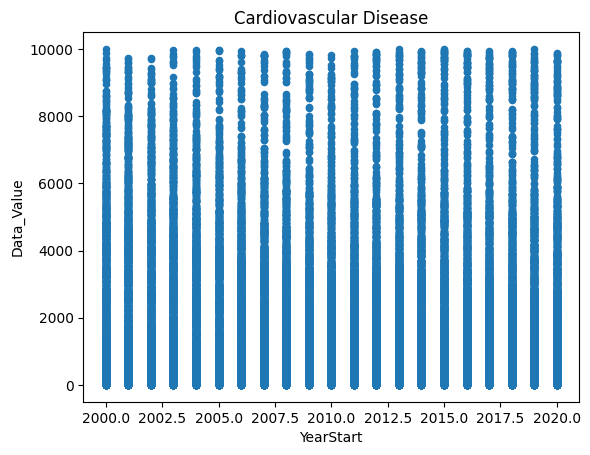

In [134]:
#df.plot_scatter('YearStart', 'Data_Value')
df.plot.scatter(x='YearStart', y='Data_Value')
#plt.scatter(df.col1, df.col2, s=df.col3)
plt.xlabel('YearStart')
plt.ylabel('Data_Value')
plt.title('Cardiovascular Disease')
plt.show()

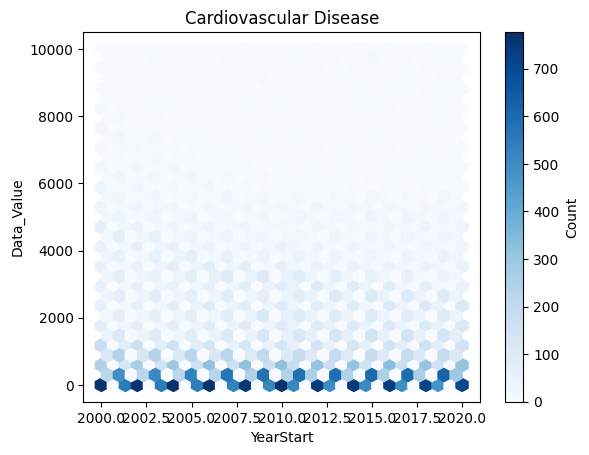

In [135]:
plt.hexbin(df['YearStart'], df['Data_Value'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('YearStart')
plt.ylabel('Data_Value')
plt.title('Cardiovascular Disease')
plt.show()

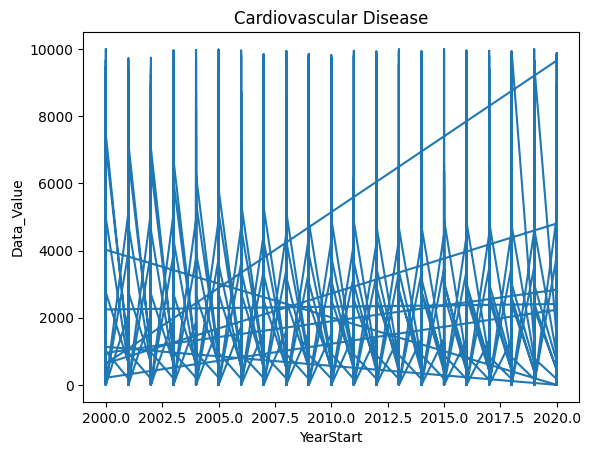

In [136]:
plt.plot(df['YearStart'], df['Data_Value'])
plt.xlabel('YearStart')
plt.ylabel('Data_Value')
plt.title('Cardiovascular Disease')
plt.show()

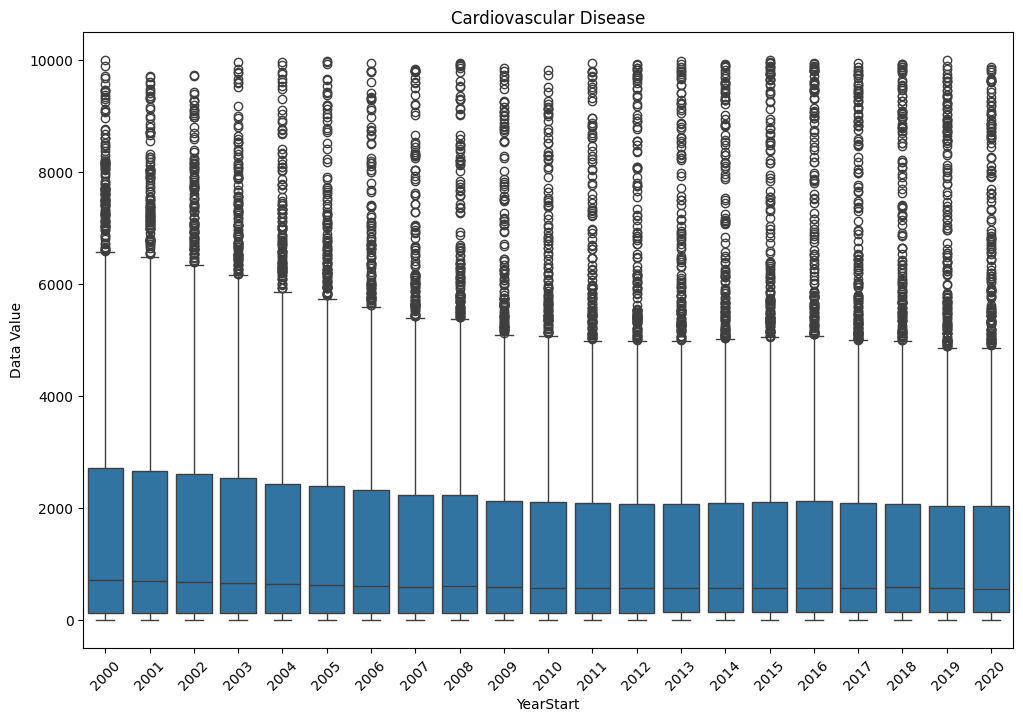

In [137]:
# Convert YearStart to a categorical type for proper grouping
df['YearStart'] = df['YearStart'].astype('category')

# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='YearStart', y='Data_Value', data=df)
plt.xlabel('YearStart')
plt.ylabel('Data Value')
plt.title('Cardiovascular Disease')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

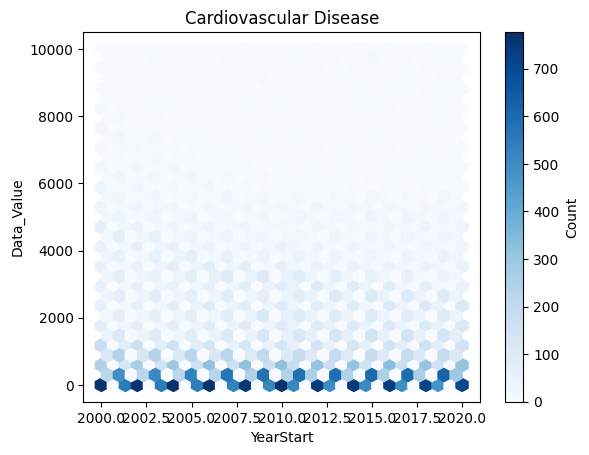

In [138]:
plt.hexbin(df['YearStart'], df['Data_Value'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('YearStart')
plt.ylabel('Data_Value')
plt.title('Cardiovascular Disease')
plt.show()

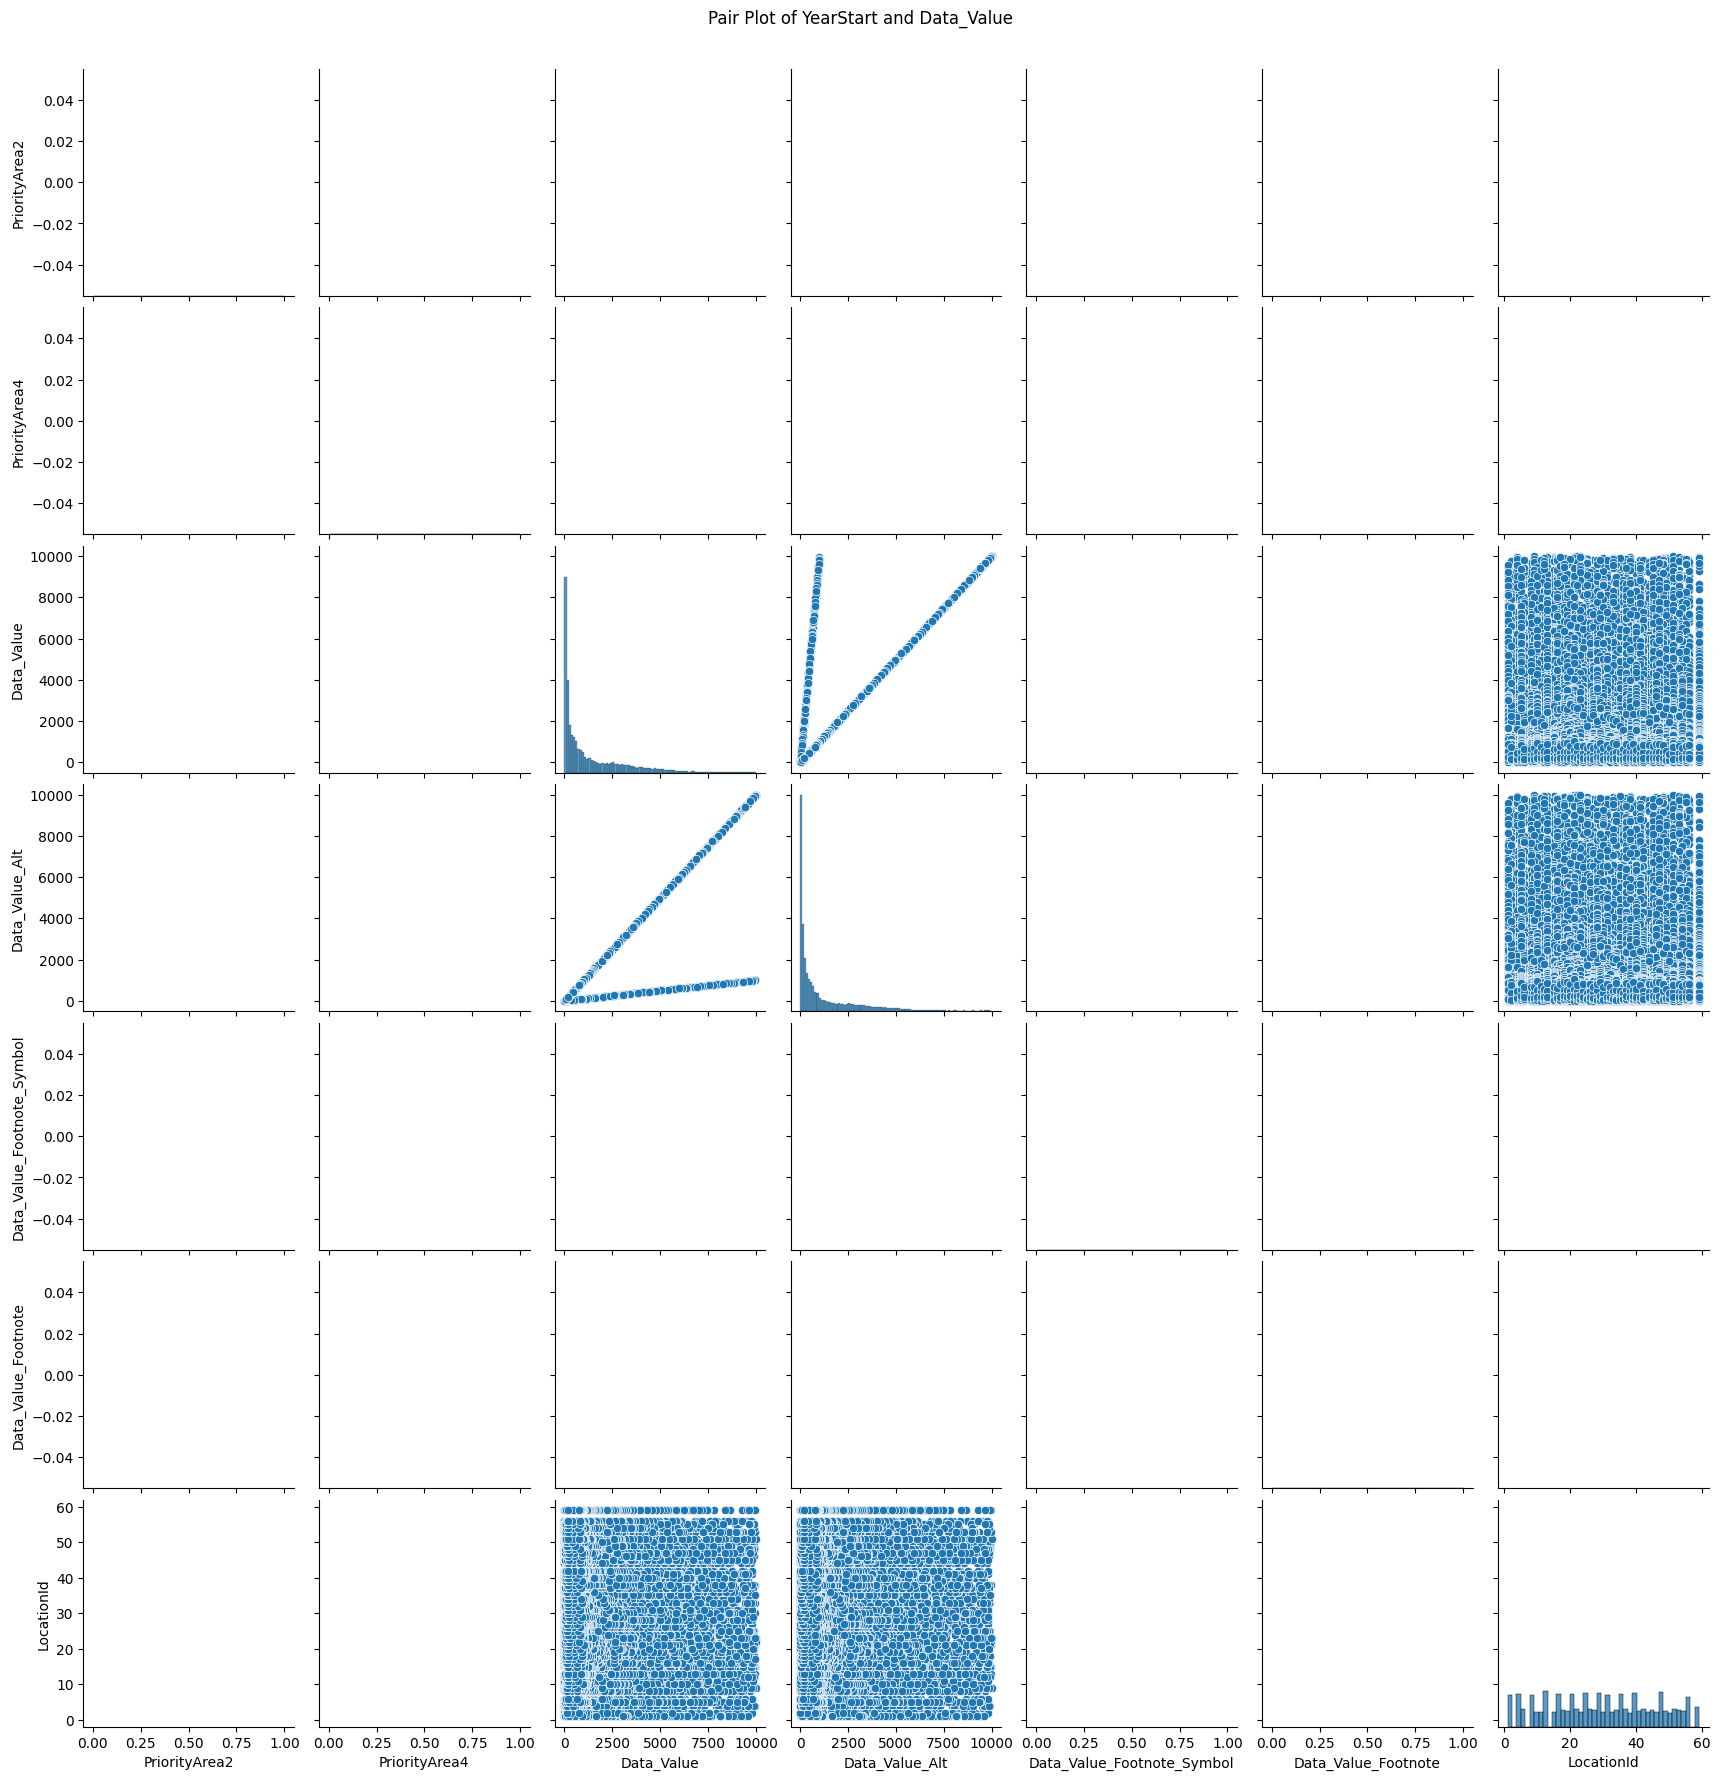

In [139]:
sns.pairplot(df)
plt.suptitle('Pair Plot of YearStart and Data_Value', y=1.02)
plt.show()

In [140]:
df.columns

Index(['RowId', 'YearStart', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4',
       'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value_Unit',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Break_Out_Category', 'Break_Out', 'ClassId', 'TopicId', 'QuestionId',
       'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId', 'LocationId',
       'Geolocation'],
      dtype='object')

In [141]:
df.to_csv('original_dataset_backup.csv', index=False)

In [142]:
columns_to_drop = ['RowId', 'DataSource', 'PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Question', 
                   'Data_Value_Type', 'Data_Value_Unit', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 
                   'Low_Confidence_Limit', 'High_Confidence_Limit', 'ClassId', 'TopicId', 'QuestionId',  'BreakOutCategoryId', 'BreakOutId', 'Geolocation']

In [146]:
df = df.drop(columns=columns_to_drop)

In [147]:
df.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'Class', 'Topic',
       'Data_Value', 'Break_Out_Category', 'Break_Out', 'Data_Value_TypeID',
       'LocationId'],
      dtype='object')

In [144]:
#remaining columns 'YearStart', 'LocationAbbr', 'LocationDesc', 'Class', 'Topic', 'Data_Value',  'Break_Out_Category', 'Break_Out', 'Data_Value_TypeID', 'LocationId'

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49459 entries, 1 to 174711
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   YearStart           49459 non-null  category
 1   LocationAbbr        49459 non-null  object  
 2   LocationDesc        49459 non-null  object  
 3   Class               49459 non-null  object  
 4   Topic               49459 non-null  object  
 5   Data_Value          49459 non-null  float64 
 6   Break_Out_Category  49459 non-null  object  
 7   Break_Out           49459 non-null  object  
 8   Data_Value_TypeID   49459 non-null  object  
 9   LocationId          49459 non-null  int64   
dtypes: category(1), float64(1), int64(1), object(7)
memory usage: 3.8+ MB


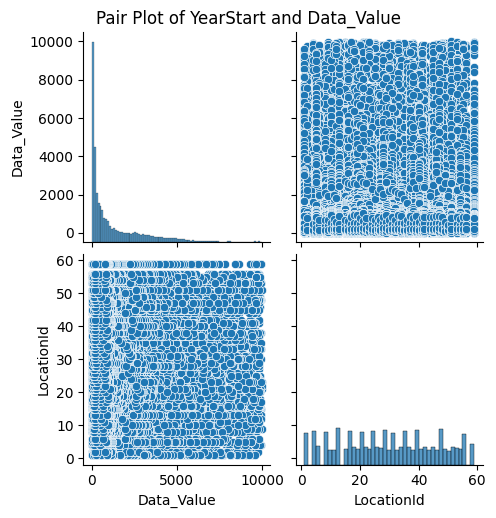

In [149]:
sns.pairplot(df)
plt.suptitle('Pair Plot of YearStart and Data_Value', y=1.02)
plt.show()

In [153]:
value_counts = df['YearStart'].value_counts()
print(value_counts)

YearStart
2003    2371
2006    2370
2020    2367
2001    2366
2004    2365
2000    2364
2007    2363
2005    2363
2002    2361
2016    2356
2017    2353
2009    2352
2008    2351
2015    2351
2019    2347
2011    2347
2018    2346
2014    2345
2012    2343
2010    2341
2013    2337
Name: count, dtype: int64


In [145]:
# Number of columns per state per year
columns_per_state_year = 20

# Total number of states
num_states = 50

# Total number of years
num_years = 22

# Separating the dataset by blocks of columns for each state and year
blocks = []
for state_index in range(num_states):
    for year_index in range(num_years):
        start_col = (state_index * num_years * columns_per_state_year) + (year_index * columns_per_state_year)
        end_col = start_col + columns_per_state_year
        block = df.iloc[:, start_col:end_col]
        blocks.append(block)